In [1]:
from __future__ import print_function, division, absolute_import
import os
import sys
sys.path.insert(0, "C:\\Users\\Matt\\Desktop\\orbithunter\\")
from orbithunter import *
import numpy as np
import itertools
from math import pi
import matplotlib.pyplot as plt
from orbithunter.arrayops import swap_modes
%matplotlib inline
import time
from scipy.optimize import root

There are many many different ways to generate initial conditions, the easiest of which is to simply generate
random modes, and then scale them to the relevant scales. 

-5.809692922307713 -5.591812301291185 2.07730229616303e-24 0.0035329858619744412


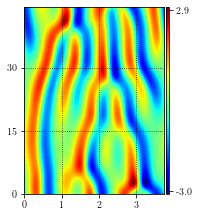

In [2]:
tmp = read_h5('RelativeOrbitKS_L33p280_T44p304.h5', directory='local')
fsolveS = calculate_spatial_shift(tmp.convert(to='s_modes').change_reference_frame(to='physical').state, tmp.L)
test = tmp.copy()
test.S = fsolveS
print(tmp.S, fsolveS, tmp.residual(), test.residual())
test.plot()

In [3]:
tmp = read_h5('RelativeOrbitKS_L33p280_T44p304.h5', directory='local')

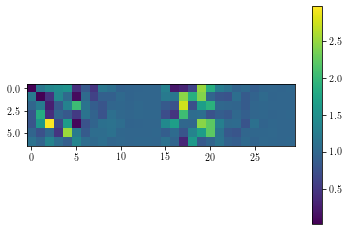

In [5]:
plt.imshow(np.abs(1+rediscretize(tmp, new_N=8, new_M=32).convert(to='modes').change_reference_frame(to='physical').state))
_ = plt.colorbar()
_ = plt.show()

In [11]:
N, M = 512, 512
tmp = RelativeOrbitKS(T=90, L=22, S=5, magnitude=2, seed=2, N=N, M=N, spectrum='gaussian', xvar=5, tscale=0, tvar=1)
# tmp = RelativeOrbitKS(T=90, L=22, S=5, magnitude=2, seed=2, spectrum='gaussian')

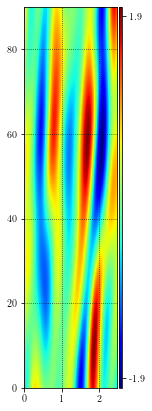

In [12]:
tmp.plot(padding=False)

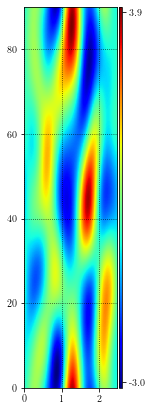

In [5]:
OrbitKS(T=90, L=22, magnitude=4, seed=2,spectrum='gaussian').plot()

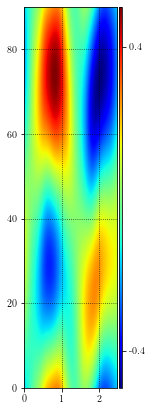

In [10]:
OrbitKS(T=90, L=22, magnitude=4, seed=2,spectrum='piecewise-exponential').plot()

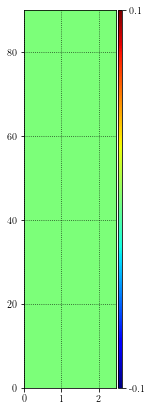

In [14]:
(OrbitKS(T=90, L=22, magnitude=4, seed=2, spectrum='exponential', tscale=0)-OrbitKS(T=90, L=22, magnitude=4, seed=2, spectrum='exponential',tscale=1)).plot()

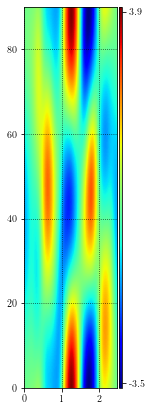

In [11]:
OrbitKS(T=90, L=22, magnitude=4, seed=2, spectrum='exponential').plot()

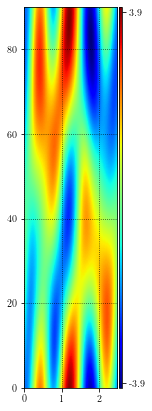

In [9]:
OrbitKS(T=90, L=22, magnitude=4, seed=2,spectrum='linear').plot()

In [9]:
N, M = 512, 512
tmp = OrbitKS(T=90, L=22, magnitude=2, seed=2, N=N, M=N, spectrum='gaussian', xvar=5, tscale=0, tvar=2)

OrbitKS({"state_type": "modes", "N": "512", "M": "512", "T": "9.e+01", "L": "2.2e+01"})

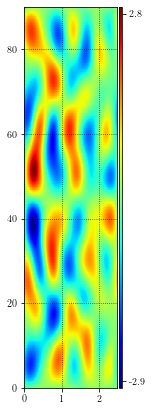

In [10]:
tmp.plot(padding=False)

In [16]:
tmp.rescale(2, inplace=True)

OrbitKS({"state_type": "field", "N": "512", "M": "512", "T": "9.e+01", "L": "2.2e+01"})

In [62]:
tmp1 = OrbitKS(T=90, L=22, magnitude=np.sqrt(N*M), seed=2, N=N, M=N, spectrum='gaussian', xvar=5, tscale=0, tvar=2)

In [71]:
N=32; M=32
(OrbitKS(T=90, L=22, magnitude=np.sqrt(N*M), seed=2, N=N, M=N).convert(to='field')/3).state.max()

3.240333403902287

In [77]:
OrbitKS(T=90, L=22, magnitude=np.sqrt(N*M), seed=2, N=N, M=N).convert(to='field').norm()

2048.0

In [85]:
np.sqrt(N*M)

32.0

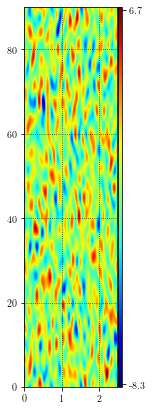

In [84]:
N=32; M=32
OrbitKS(T=90, L=22, magnitude=np.sqrt(N*M), seed=2, N=N, M=N).convert(to='field').plot()

In [72]:
(OrbitKS(T=90, L=22, magnitude=np.sqrt(N*M), seed=2, N=N, M=N).convert(to='field')/3).norm()

682.4992916892719

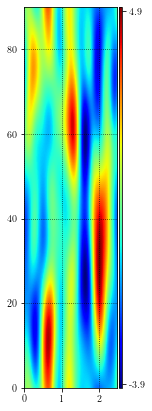

In [63]:
tmp1.plot(padding=False)

In [37]:
np.sqrt(N*M)

512.0

In [36]:
tmp1.norm()

256.0

In [159]:
tmp1.convert(to='field').norm() / np.sqrt(tmp1.M*tmp1.N)

0.796798162664654

In [160]:
tmp1.convert(to='field').norm() / (tmp1.M*tmp1.N)

0.017606918251786206

In [165]:
f = tmp1.convert(to='field')

OrbitKS({"state_type": "field", "N": "64", "M": "32", "T": "9.e+01", "L": "2.2e+01"})

In [176]:
ftest = np.sqrt(f.N*f.M)*f / f.norm()

In [177]:
ftest.norm()

45.254833995939045

In [178]:
ftest.state.max()

3.404382916105065

In [204]:
tmp = OrbitKS(T=90, L=22, norm=5, seed=1).convert(to='field')
tmp.norm(), tmp.state.max()

(9.959977033308174, 0.7492586462704927)

In [210]:
tmp.norm() / np.sqrt(tmp.M*tmp.N)

0.2200864781473276

(0.2200864781473276, 0.9115061819488951)

In [217]:
tmp1 = OrbitKS(T=90, L=22, norm=5, seed=1)
tmp1.norm() / np.sqrt(tmp1.M*tmp1.N)

0.11048543456039804

In [265]:
OrbitKS(T=90, L=22, norm=18, seed=1)

OrbitKS({"state_type": "modes", "N": "64", "M": "32", "T": "9.e+01", "L": "2.2e+01"})

In [268]:
tmp

OrbitKS({"state_type": "modes", "N": "64", "M": "32", "T": "9.e+01", "L": "2.2e+01"})

In [277]:
np.sqrt(tmp2.M*tmp2.N)

63.49803146555018

In [349]:
maxlist = []
for n in np.arange(64, 2048, 2):
    tmp = OrbitKS(T=90, L=22, norm=3, seed=1)
    tmp2 = rediscretize(tmp, new_N=64, new_M=n)
    maxlist.append(tmp2.norm()/tmp.norm())

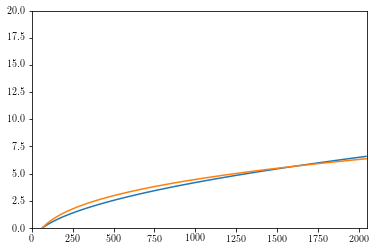

In [356]:
_ = plt.plot(np.arange(64, 2048, 2), maxlist-min(maxlist))
_ = plt.plot(np.arange(64, 2048, 2), np.arange(64, 2048, 2)**0.3 - min( np.arange(64, 2048, 2)**0.3))
plt.xlim([0, 2050])
plt.ylim([0, 20])
_ = plt.show()

In [249]:
tmp.convert(to='field').state.max()

3.2814222550160226

In [209]:
tmp.norm()/np.sqrt(tmp.M*tmp.N)

0.2200864781473276

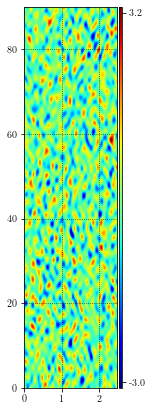

In [161]:
tmp1.plot()

In [186]:
f2 = tmp2.convert(to='field')
f2test = np.sqrt(f2.N*f2.M)*f2 / f2.norm()

In [187]:
f2test.state.max()

4.141581934619018

In [194]:
m = f2test.convert(to='modes').norm() / f2test.state.max()

In [195]:
tmp1 = OrbitKS(T=90, L=22, norm=4*m, seed=1)

In [200]:
tmp1

OrbitKS({"state_type": "modes", "N": "64", "M": "32", "T": "9.e+01", "L": "2.2e+01"})

In [199]:
tmp1.convert(to='field').state.max()

18.59975079077095

In [189]:
f2test.convert(to='modes').norm()

128.5143525652139

In [190]:
np.sqrt(f2.N*f2.M)

256.0

In [154]:
tmp2.convert(to='field').state.max() 

4.125006095036946

In [155]:
tmp1 = OrbitKS(T=90, L=22, norm=6.67*3, seed=1)

In [116]:
tmp1 = OrbitKS(T=40, L=22, norm=6.67*3, seed=1)

In [117]:
tmp1.norm() / (np.sqrt(tmp1.M)*np.sqrt(tmp1.N))

0.6253124999999998

In [118]:
tmp1.convert(to='field').state.max() 

4.441419053435377

In [89]:
test1 =  0.5*np.sqrt(tmp1.M)*np.sqrt(tmp1.N)*(tmp1/tmp1.norm())

In [52]:
test1.convert(to='field').state.max()

3.390757565699316

In [37]:
test2 =  0.5*np.sqrt(tmp2.M*tmp2.N)*(tmp2/tmp2.norm())

In [40]:
test2.convert(to='field').state.max()

4.1250060950369445

In [38]:
test1.convert(to='field').norm()

45.07371072457269

In [39]:
test2.convert(to='field').norm()

254.97541205268925

In [141]:
test2.state.max()

11.567403440583293

In [142]:
test2.convert(to='field').state.max()

4.1250060950369445

In [127]:
tmp.norm()

20.36467529817257

In [128]:
test.norm()

22.627416997969522

In [131]:
test.convert(to='field').state.max()

3.390757565699316

In [130]:
tmp.convert(to='field').state.max()

3.0516818091293847

In [103]:
tmp.state.max() / np.sqrt(tmp.M*tmp.N)

0.04066665272080064

In [90]:
test.norm()

11.065577565222842

In [83]:
test.state.max()

1.0

In [78]:
test.convert(to='field').state.max()

0.35660605391912736

In [68]:
OrbitKS(T=90, L=22, norm=0.39, seed=1).convert(to='field').state.max()

2.6447909012454662

In [61]:
OrbitKS(T=90, L=22, norm=0.42, seed=1).norm()

19.007030278294398

0.0030346805023360847

In [65]:
tmp.state.max()

3.217504754128817

In [60]:
tmp.norm() 

214.17934612425904

In [50]:
OrbitKS(T=90, L=22, norm=0.42, seed=1).convert(to='field').state.max()

2.848236355187425

In [44]:
OrbitKS(T=90, L=22, norm=2*0.42, seed=1).convert(to='field').norm()


75.72383401728212

In [ ]:
tmp.norm()/(tmp.M*tmp.N)

In [37]:
np.sqrt(tmp.M * tmp.N)

45.254833995939045

In [32]:
np.abs(OrbitKS(T=90, L=22, norm=0.42, seed=1).convert(to='field').state).max()

3.0026456242000616

In [41]:
large_test =rediscretize(test.convert(to='field'), new_N=256, new_M=256).convert(to='modes')

In [42]:
np.linalg.norm(large_test.state) / (256)

0.6827389265817161

In [45]:
def orbit_norm_scale(orbit_):
    return np.linalg.norm(orbit_.convert(to='modes').state) / (np.sqrt(orbit_.N*orbit_.M))

In [43]:
np.linalg.norm(large_test.state) / (np.sqrt(large_test.N*large_test.M))

0.6827389265817161

In [55]:
large_test.convert(to='field').state.max()

3.1521257946380032

In [49]:
tmp = OrbitKS(T=20,L=20)

In [60]:
large_test.convert(to='field').state.max(), orbit_norm_scale(large_test)

(3.1521257946380032, 0.6827389265817161)

In [59]:
tmp.convert(to='field').state.max(), orbit_norm_scale(tmp)

(5.7409861777113385, 0.9424299619298289)

In [50]:
orbit_norm_scale(tmp)

0.9424299619298289

In [46]:
orbit_norm_scale(large_test)

0.6827389265817161

In [40]:
np.linalg.norm(test.state) / (32)

0.6827389265817162

In [9]:
test.convert(to='field').state.max()

-2.5569283125364333

In [5]:
read_h5('RelativeOrbitKS_L21p956_T69p994.h5', directory='local')

RelativeOrbitKS({"state_type": "modes", "frame": "comoving", "N": "32", "M": "32", "T": "7.e+01", "L": "2.2e+01", "S": "1.00e+00"})

In [4]:
read_h5('RelativeOrbitKS_L21p956_T69p994.h5', directory='local').S

1.0034155485944871

In [4]:
repr(RelativeOrbitKS(T=44, L=44, randomkwarg='im nothing'))

TypeError: Object of type int32 is not JSON serializable

In [11]:
def hey(T=0, L=0, **kwargs):
    print(kwargs)
    print(T, L)

In [1]:
hey(T=0, L=0, S=0)

NameError: name 'hey' is not defined

In [2]:
RelativeOrbitKS(T=44, L=44)

TypeError: Object of type int32 is not JSON serializable

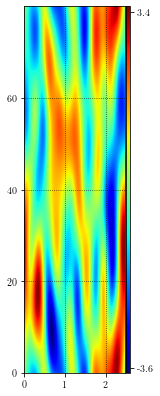

In [28]:
N = 64
M = 32
T = 80
L = 22
n, m = int(N // 2) - 1, int(M // 2) - 1
sms = int(L / (2*pi*np.sqrt(2)))
tms = 1
# sms = np.argmax((test.wave_vector(test.parameters, power=2) - test.wave_vector(test.parameters, power=4)).ravel())
sigma_time = 1
sigma_space = 3

np.random.seed(1)
tester = OrbitKS(state=4*np.random.randn(N,M), state_type='field', T=T, L=L).convert(to='modes')

space = np.abs((tester.L / (2 * pi)) * tester.elementwise_dxn(tester.parameters))
time = np.abs((tester.T / (2 * pi)) * tester.elementwise_dtn(tester.parameters))

mollifier = np.exp(-(space-sms)**2/(2*sigma_space**2)-(time-tms)**2/(2*sigma_time**2))

modes = 3*np.multiply(mollifier, tester.state)
test_orbit = OrbitKS(state=modes, state_type='modes', T=tester.T, L=tester.L)
test_orbit.plot()

In [ ]:
result = converge(test_orbit, method='gradient', verbose=True)

In [11]:
tmp = converge(test_orbit, method='adj', verbose=True)
result = converge(tmp.orbit, method='tnc', verbose=True)

Starting adj numerical method. Initial residual 7664.435070583753
Maximum number of (outer loop) iterations = 32768
........................Step number 2500 residual 4.319273606733244
........................Step number 5000 residual 2.904066557107177
........................Step number 7500 residual 2.3390242194623583
........................Step number 10000 residual 1.9744514172606593
........................Step number 12500 residual 1.6921177204805657
........................Step number 15000 residual 1.4861820576581557
........................Step number 17500 residual 1.335406546884307
........................Step number 20000 residual 1.2109708709043372
........................Step number 22500 residual 1.101530792071374
........................Step number 25000 residual 1.003190684922696
........................Step number 27500 residual 0.9139508829738079
........................Step number 30000 residual 0.8323519810961123
........................Step number 32500 residual 0

In [3]:
lbfgsb_result = converge(test_orbit, method='l-bfgs-b', verbose=True)

Starting l-bfgs-b numerical method. Initial residual 7664.435070583753

Failed to converge. Exiting with residual 123.99017978908573


In [43]:
N = 256
M = 256
T = 512
L = 512
n, m = int(N // 2) - 1, int(M // 2) - 1
sms = int(L / (2*pi*np.sqrt(2)))
tms = int(np.sqrt(T/10))

sigma_time = int(np.sqrt(tms))
sigma_space = np.sqrt(sms)

In [48]:
test = np.array([1.0, 2.0, 3.0]).astype(int)
test

array([1, 2, 3])

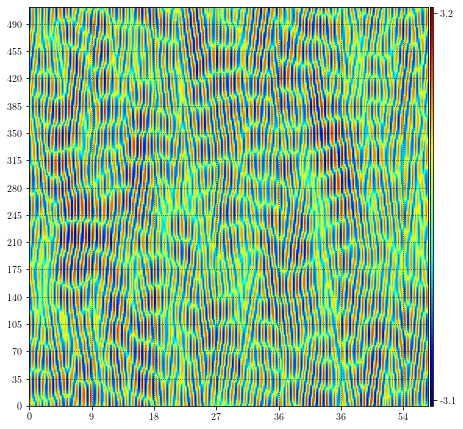

In [45]:
np.random.seed(0)
tester = OrbitKS(state=4*np.random.randn(N,M), state_type='field', T=T, L=L).convert(to='modes')
tester.state = np.random.randn(*tester.state.shape)
space = np.abs((tester.L / (2 * pi)) * tester.elementwise_dxn(tester.parameters))
time = np.abs((tester.T / (2 * pi)) * tester.elementwise_dtn(tester.parameters))

mollifier = np.exp(-(space-sms)**2/(2*sigma_space**2)-(time-tms)**2/(2*sigma_time**2))

modes = np.multiply(mollifier, tester.state)
test_orbit = OrbitKS(state=modes, state_type='modes', T=tester.T, L=tester.L)


good_large_guess = OrbitKS(state=np.sign(test_orbit.convert(to='field').state) * np.abs(test_orbit.convert(to='field').state)**(1./3.),
                                                                      state_type='field', T=512, L=512).rescale(2.5)
good_large_guess.plot()

#### Gaussian with different std

In [31]:
test_orbit**(-1./3.)

C:\Users\Matt\Desktop\orbithunter\orbithunter\orbit.py:174: RuntimeWarning: invalid value encountered in power
  return self.__class__(state=self.state**power, state_type=self.state_type,


OrbitKS({"state_type": "modes", "N": 256, "M": 256, "T": "5.12e+02", "L": "5.12e+02", "S": "0.e+00"})

In [33]:
test_orbit.state**(1./3.)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in power
  """Entry point for launching an IPython kernel.


array([[           nan,            nan,            nan, ...,
                   nan,            nan,            nan],
       [           nan,            nan, 1.08488766e-01, ...,
        1.20486934e-02,            nan, 2.91399443e-02],
       [           nan,            nan,            nan, ...,
                   nan, 1.78101239e-02, 4.06106439e-02],
       ...,
       [4.22579344e-04,            nan, 4.18064315e-04, ...,
        1.23439864e-04,            nan, 8.11090590e-05],
       [           nan, 3.51871032e-04, 3.92898520e-04, ...,
                   nan, 1.02909392e-04,            nan],
       [2.73958255e-04,            nan, 2.87643190e-04, ...,
        1.30803260e-04, 1.13641216e-04,            nan]])

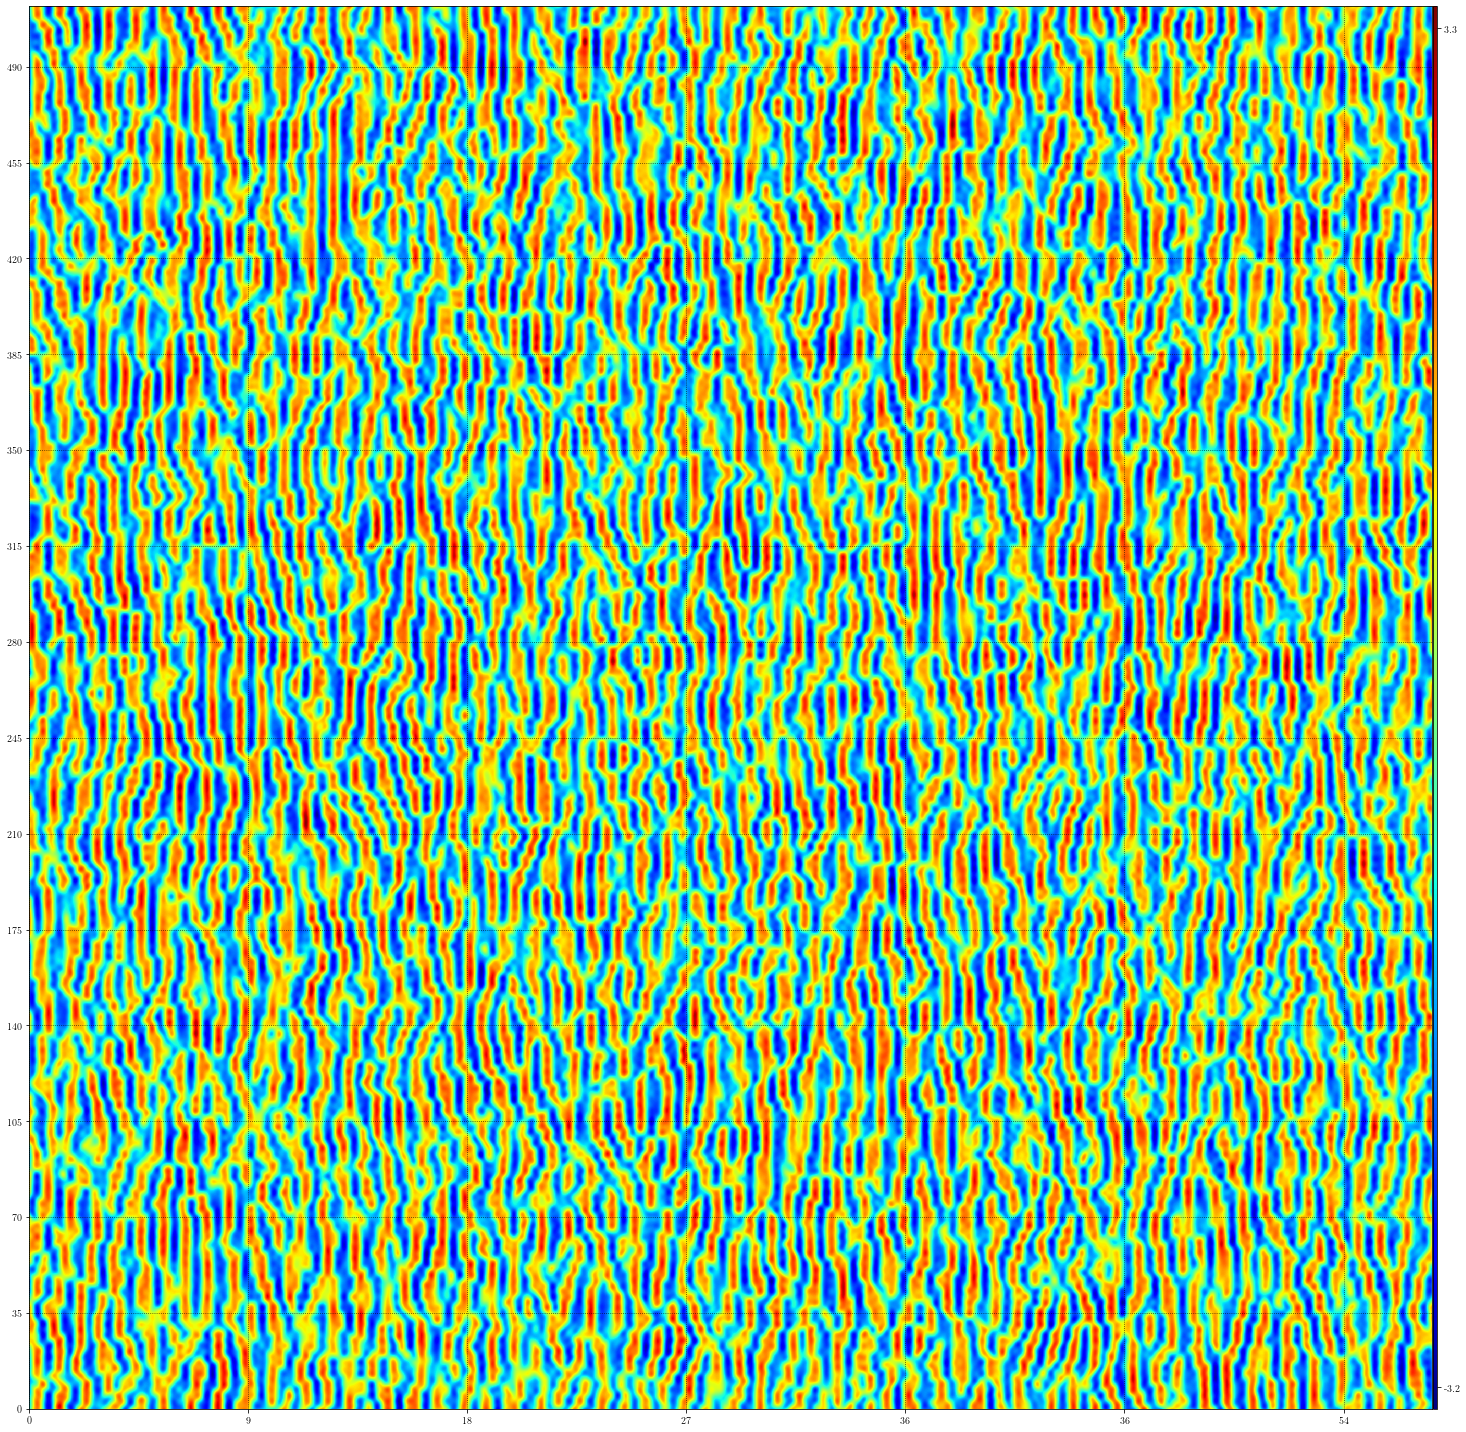

In [29]:
N = 256
M = 256
T = 512
L = 512
n, m = int(N // 2) - 1, int(M // 2) - 1
sms = int(L / (2*pi*np.sqrt(2)))
tms = int(np.sqrt(T/10))

sigma_time = 20
sigma_space = 15

np.random.seed(0)
tester = OrbitKS(state=4*np.random.randn(N,M), state_type='field', T=T, L=L).convert(to='modes')
tester.state = np.random.randn(*tester.state.shape)
space = np.abs((tester.L / (2 * pi)) * tester.elementwise_dxn(tester.parameters))
time = np.abs((tester.T / (2 * pi)) * tester.elementwise_dtn(tester.parameters))

mollifier = np.exp(-(space-sms)**2/(2*sigma_space**2)-(time-tms)**2/(2*sigma_time**2))

modes = 3*np.multiply(mollifier, tester.state)
test_orbit = OrbitKS(state=modes, state_type='modes', T=tester.T, L=tester.L)


good_large_guess = OrbitKS(state=np.sign(test_orbit.convert(to='field').state) * np.abs(test_orbit.convert(to='field').state)**(1./3.),
                                                                      state_type='field', T=512, L=512).rescale(2.5)

good_large_guess = OrbitKS(state=test_orbit.convert(to='field').state**(1./3.),
                                                                      state_type='field', T=512, L=512).rescale(2.5)
good_large_guess.plot(figsize=(20,20))

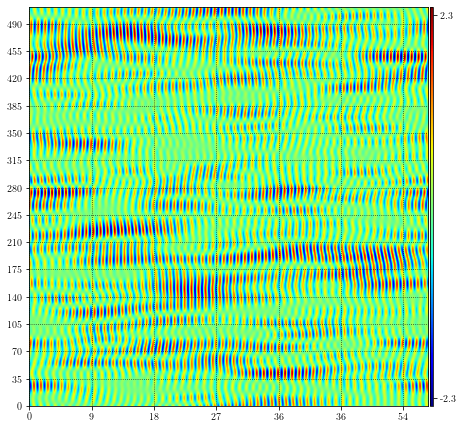

In [8]:
N = 256
M = 256
T = 512
L = 512
n, m = int(N // 2) - 1, int(M // 2) - 1
sms = int(L / (2*pi*np.sqrt(2)))
tms = int(np.sqrt(T/10))

sigma_time = 10
sigma_space = 2

np.random.seed(0)
tester = OrbitKS(state=4*np.random.randn(N,M), state_type='field', T=T, L=L).convert(to='modes')

space = np.abs((tester.L / (2 * pi)) * tester.elementwise_dxn(tester.parameters))
time = np.abs((tester.T / (2 * pi)) * tester.elementwise_dtn(tester.parameters))

mollifier = np.exp(-(space-sms)**2/(2*sigma_space**2)-(time-tms)**2/(2*sigma_time**2))

modes = 3*np.multiply(mollifier, tester.state)
test_orbit = OrbitKS(state=modes, state_type='modes', T=tester.T, L=tester.L)

test_orbit.plot()
plt.show()

In [6]:
large_result = converge(good_large_guess)

Starting adj numerical method. Initial residual 21340.23160121043
........................Step number 2500 residual 19.762386209922465
........................Step number 5000 residual 8.982139516243546
........................Step number 7500 residual 5.62851396959022
........................Step number 10000 residual 4.594929047940307
........................Step number 12500 residual 3.929396746485603
........................Step number 15000 residual 3.4100635932453396
........................Step number 17500 residual 3.0038499473515485
........................Step number 20000 residual 2.674395342219975
........................Step number 22500 residual 2.3932596581787418
........................Step number 25000 residual 2.152370458393731
........................Step number 27500 residual 1.9553517130973326
........................Step number 30000 residual 1.7881062359145605
........................Step number 32500 residual 1.6460964021393496
........................Step numbe

........................Step number 290000 residual 0.1392936017824127
........................Step number 292500 residual 0.13770782831157014
........................Step number 295000 residual 0.1361293238224092
........................Step number 297500 residual 0.13455658101647447
........................Step number 300000 residual 0.13299273657327512
........................Step number 302500 residual 0.13144686598516106
........................Step number 305000 residual 0.12992995554967093
........................Step number 307500 residual 0.12844848949644194
........................Step number 310000 residual 0.12700298119048273
........................Step number 312500 residual 0.1255907643139492
........................Step number 315000 residual 0.12420850196684616
........................Step number 317500 residual 0.12285320130055044
........................Step number 320000 residual 0.12152241623800304
........................Step number 322500 residual 0.1202141901833

........................Step number 575000 residual 0.04656424086402477
........................Step number 577500 residual 0.04624773304486347
........................Step number 580000 residual 0.04593545172906379
........................Step number 582500 residual 0.045627368275146095
........................Step number 585000 residual 0.04532346491329854
........................Step number 587500 residual 0.04502373101922169
........................Step number 590000 residual 0.04472815911732932
........................Step number 592500 residual 0.04443674101549434
........................Step number 595000 residual 0.04414946443115033
........................Step number 597500 residual 0.04386631042892285
........................Step number 600000 residual 0.04358725193784952
........................Step number 602500 residual 0.04331225352619706
........................Step number 605000 residual 0.043041272464496697
........................Step number 607500 residual 0.04277426

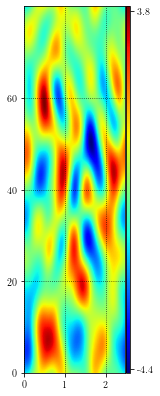

In [6]:
N = 64
M = 32
T = 80
L = 22
n, m = int(N // 2) - 1, int(M // 2) - 1
sms = int(L / (2*pi*np.sqrt(2)))
tms = int(np.sqrt(T/10))

sigma_time = 2
sigma_space = 2

np.random.seed(0)
tester = OrbitKS(state=4*np.random.randn(N,M), state_type='field', T=T, L=L).convert(to='modes')

space = np.abs((tester.L / (2 * pi)) * tester.elementwise_dxn(tester.parameters))
time = np.abs((tester.T / (2 * pi)) * tester.elementwise_dtn(tester.parameters))

mollifier = np.exp(-(space-sms)**2/(2*sigma_space**2)-(time-tms)**2/(2*sigma_time**2))

modes = 3*np.multiply(mollifier, tester.state)
test_orbit = OrbitKS(state=modes, state_type='modes', T=tester.T, L=tester.L)
test_orbit.plot()

#### Gaussian with different std

In [4]:
N = 256
M = 256
T = 512
L = 512
n, m = int(N // 2) - 1, int(M // 2) - 1
sms = int(L / (2*pi*np.sqrt(2)))
tms = 2

sigma_time = 20
sigma_space = 2

np.random.seed(0)
tester = OrbitKS(state=4*np.random.randn(N,M), state_type='field', T=T, L=L).convert(to='modes')

space = np.abs((tester.L / (2 * pi)) * tester.elementwise_dxn(tester.parameters))
time = np.abs((tester.T / (2 * pi)) * tester.elementwise_dtn(tester.parameters))

mollifier = np.exp(-(space-sms)**2/(2*sigma_space**2)-(time-tms)**2/(2*sigma_time**2))

modes = 3*np.multiply(mollifier, tester.state)
test_orbit = OrbitKS(state=modes, state_type='modes', T=tester.T, L=tester.L)

test_orbit.plot()
plt.show()

# "Modulated"

others methods : 

    1. truncation
    2. scaling by linear component
    3. scaling like sqrt((j-sms)**2)/sms
    4. only scaling after j > sms

In [14]:
N = 32
M = 32
T = 50
L = 22
n, m = int(N // 2) - 1, int(M // 2) - 1
sms = int(L / (2*pi*np.sqrt(2)))
tms = 1

np.random.seed(0)
tester = OrbitKS(state=4*np.random.randn(N,M), state_type='field', T=T, L=L).convert(to='modes')

# space = np.abs((tester.L / (2 * pi)) * tester.elementwise_dxn(tester.parameters))
# time = np.abs((tester.T / (2 * pi)) * tester.elementwise_dtn(tester.parameters))

space = np.abs((tester.L/(2*pi))*tester.elementwise_dxn(tester.parameters))
time = np.abs((tester.T/(2*pi))*tester.elementwise_dtn(tester.parameters))

abs_mollifier = (tester.elementwise_dxn(tester.parameters, power=2)
                       -tester.elementwise_dxn(tester.parameters, power=4))

modulated_time = time.copy()
modulated_time[modulated_time<=tms] = 1
modulated_time[modulated_time>tms] = 0 

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log10
  """Entry point for launching an IPython kernel.


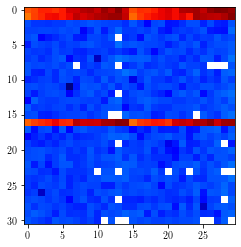

In [25]:
plt.imshow(np.log10(np.abs(test_orbit.rescale(3).convert(to='modes').state)), cmap='jet')

In [27]:
np.argmax(np.abs(test_orbit.rescale(3).convert(to='modes').state),axis=0)

array([27, 29, 15, 29, 27, 13, 29, 29, 11, 14, 11, 29, 29, 13,  0, 29, 13,
       27, 14, 27, 29, 13, 29, 27, 29, 28, 28, 29, 22, 14, 28],
      dtype=int64)

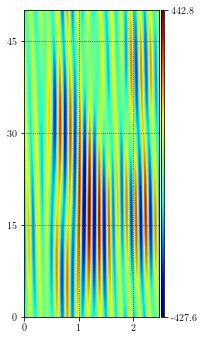

In [20]:
modes = np.multiply(modulated_time, np.multiply(abs_mollifier, tester.state))
test_orbit = OrbitKS(state=modes, state_type='modes', T=tester.T, L=tester.L).rescale(3)
test_orbit.plot()

In [66]:
import time
t0 = time.time()
result = converge(test_orbit, method='gradient', verbose=True)
t1 = time.time()
t1-t0

Starting gradient numerical method. Initial residual 11890232.99807573
########## Residual=8.553144406688565 after 3276 gradient descent iterations
########## Residual=4.257539414166595 after 6552 gradient descent iterations
########## Residual=2.5529087315342567 after 9828 gradient descent iterations
########## Residual=1.7078344689966374 after 13104 gradient descent iterations
########## Residual=1.2976409457736313 after 16380 gradient descent iterations
########## Residual=1.0918456574914475 after 19656 gradient descent iterations
########## Residual=0.9733576605116568 after 22932 gradient descent iterations
########## Residual=0.8939246295803658 after 26208 gradient descent iterations
########## Residual=0.8351021618593667 after 29484 gradient descent iterations
########## Residual=0.7888102250777127 after 32760 gradient descent iterations

Failed to converge. Maximum number of iterations reached. exiting with residual 0.7887086653205793


39.72904872894287

In [67]:
t2 = time.time()
result2 = converge(result.orbit, method='lstsq', preconditioning=False, orbit_tol=10**-14, verbose=True)
t3 = time.time()
t3-t2

Starting lstsq numerical method. Initial residual 0.7887086653205793
65555554434434333216655555554432100111112444578
Failed to converge. Exiting with residual 0.0007442827749576479


26.353543281555176

In [68]:
t4 = time.time()
result3 = converge(result2.orbit, method='gradient', preconditioning=False,  verbose=True)
t5 = time.time()
t5-t4

0.0009989738464355469

In [69]:
result3.orbit.residual()

0.0007442827749576479

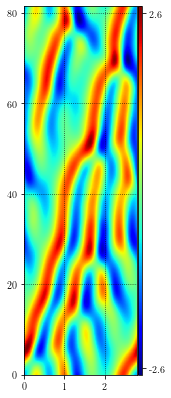

In [70]:
result3.orbit.plot()

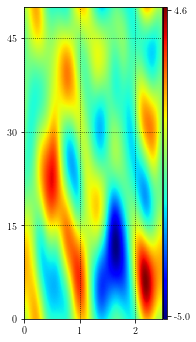

In [5]:
N = 32
M = 32
T = 50
L = 22
n, m = int(N // 2) - 1, int(M // 2) - 1
sms = int(L / (2*pi*np.sqrt(2)))
tms = 2

np.random.seed(0)
tester = OrbitKS(state=4*np.random.randn(N,M), state_type='field', T=T, L=L).convert(to='modes')

space = np.abs((tester.L / (2 * pi)) * tester.elementwise_dxn(tester.parameters))
time = np.abs((tester.T / (2 * pi)) * tester.elementwise_dtn(tester.parameters))
space[space<sms] = sms
abs_mollifier = np.exp(-1*(np.abs(space-sms)/sms))
modulated_time = time.copy()
modulated_time[modulated_time <= tms] = 1
modulated_time[modulated_time > tms] = 0

modes = 3*np.multiply(modulated_time, np.multiply(abs_mollifier, tester.state))
test_orbit = OrbitKS(state=modes, state_type='modes', T=tester.T, L=tester.L)

test_orbit.plot()
plt.show()

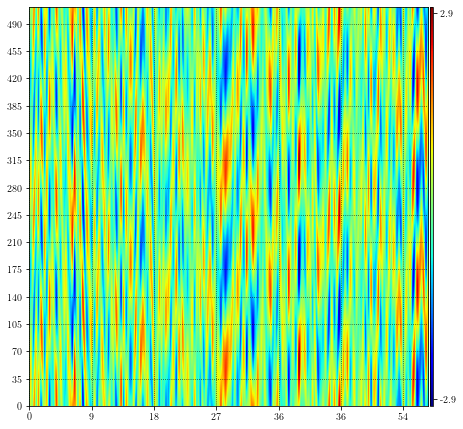

In [6]:
N = 256
M = 256
T = 512
L = 512
n, m = int(N // 2) - 1, int(M // 2) - 1
sms = int(L / (2*pi*np.sqrt(2)))
tms = 2

np.random.seed(0)
tester = OrbitKS(state=4*np.random.randn(N,M), state_type='field', T=T, L=L).convert(to='modes')

space = np.abs((tester.L / (2 * pi)) * tester.elementwise_dxn(tester.parameters))
time = np.abs((tester.T / (2 * pi)) * tester.elementwise_dtn(tester.parameters))
space[space<sms] = sms
abs_mollifier = np.exp(-1*(np.abs(space-sms)/sms))
modulated_time = time.copy()
modulated_time[modulated_time != tms] = 0
modulated_time[modulated_time == tms] = 1

modes = 3*np.multiply(modulated_time, np.multiply(abs_mollifier, tester.state))
test_orbit = OrbitKS(state=modes, state_type='modes', T=tester.T, L=tester.L)

test_orbit.plot()
plt.show()

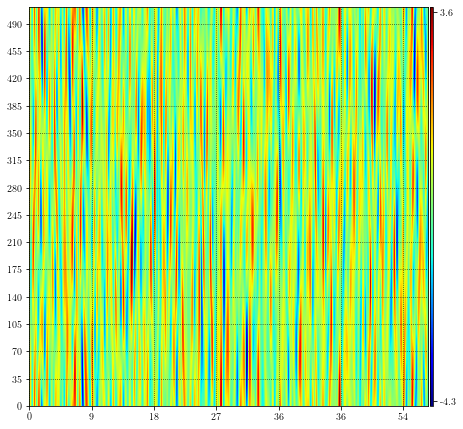

In [57]:
N = 256
M = 256
T = 512
L = 512
n, m = int(N // 2) - 1, int(M // 2) - 1
sms = int(L / (2*pi*np.sqrt(2)))
tms = 2

np.random.seed(0)
tester = OrbitKS(state=4*np.random.randn(N,M), state_type='field', T=T, L=L).convert(to='modes')

space = np.abs((tester.L / (2 * pi)) * tester.elementwise_dxn(tester.parameters))
time = np.abs((tester.T / (2 * pi)) * tester.elementwise_dtn(tester.parameters))

abs_mollifier = np.exp(-1*(np.abs(space-sms)/sms))

modulated_time = time.copy()
modulated_time[modulated_time <= tms] = 1
modulated_time[modulated_time > tms] = 0

modes = 3*np.multiply(modulated_time, np.multiply(abs_mollifier, tester.state))
test_orbit = OrbitKS(state=modes, state_type='modes', T=tester.T, L=tester.L)

test_orbit.plot()
plt.show()

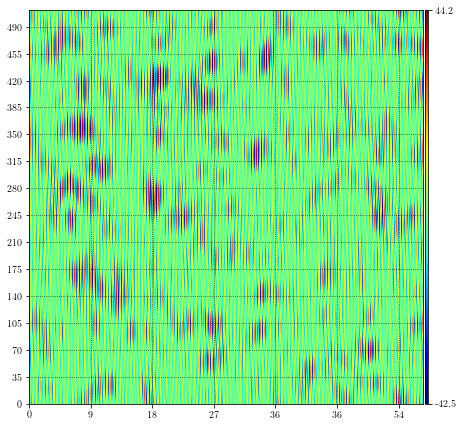

In [56]:
N = 256
M = 256
T = 512
L = 512
n, m = int(N // 2) - 1, int(M // 2) - 1
sms = int(L / (2*pi*np.sqrt(2)))
tms = int(np.sqrt(T//10))

np.random.seed(0)
tester = OrbitKS(state=4*np.random.randn(N,M), state_type='field', T=T, L=L).convert(to='modes')

space = np.abs((tester.L / (2 * pi)) * tester.elementwise_dxn(tester.parameters))
time = np.abs((tester.T / (2 * pi)) * tester.elementwise_dtn(tester.parameters))

lin_mollifier = (2*pi*space/L)**2-(2*pi*space/L)**4
lin_mollifier = lin_mollifier / np.max(lin_mollifier)

modulated_time = time.copy()
modulated_time[modulated_time <= tms] = 1
modulated_time[modulated_time > tms] = 0

modes = 3*np.multiply(modulated_time, np.multiply(lin_mollifier, tester.state))
test_orbit = OrbitKS(state=modes, state_type='modes', T=tester.T, L=tester.L)

test_orbit.plot()
plt.show()

In [ ]:
from math import pi
import numpy as np
import os





def average_spectrum_initial_condition(param_tuple,*args,**kwargs):
    symmetry=kwargs.get('symmetry','rpo')
    amplitude=kwargs.get('amplitude',5.)
    PWD = os.path.dirname(__file__)
    data_dir = os.path.abspath(os.path.join(PWD, "../../../data_and_figures/"))
    data_dir= os.path.join(data_dir,'')
    parent_folder = os.path.abspath(os.path.join(PWD, ''.join(["../../../data_and_figures/trawl/",str(symmetry),'/'])))
    Np,Mp,Tp,Lp = param_tuple
    Tstar,Lstar = 10.,2*pi*np.sqrt(2)
    if symmetry=='rpo' or symmetry=='full':
        n=Np-1
        m=Mp-2
        average_spectrum=np.zeros([n,m])
        nstar,mstar=int(Tp/10),int(Lp/(2*pi*np.sqrt(2)))
        Nstar,Mstar=2*int(nstar*n/2.)-1,int(mstar*m/2.)-1
    else:
        n=Np-1
        m=int(Mp/2)-1
        average_spectrum=np.zeros([n,m])
        nstar,mstar=int(Tp/10),int(Lp/(2*pi*np.sqrt(2)))
        Nstar,Mstar=2*int(nstar*n/2.)-1,int(mstar*Mp/2.)-1
    for files in os.listdir(parent_folder):
        folder = os.path.join(os.path.abspath(os.path.join(parent_folder, files)),'')
        check_spectrum_filepath = os.path.join(os.path.abspath(os.path.join(parent_folder,'other_data/spectrum')))
        if os.path.isfile(''.join([check_spectrum_filepath,'.h5'])):
            Orbit=Orbit_io.import_Orbit(check_spectrum_filepath)
            U,N,M,T,L,S = Orbit
            Orbit_spectrum = ks.fft_(Orbit,N,M,symmetry=symmetry)
        elif os.path.isdir(folder):
            print('accessing',folder)
            for data_file in os.listdir(folder):
                if data_file.endswith(".h5"):
                    basename = data_file.split('.h5')[0]
                    print(basename)
                    Orbit = Orbit_io.import_Orbit(''.join([folder,data_file]))
                    Ua,Na,Ma,Ta,La,Sa = Orbit

                    maxw,maxq = 2*pi*Nstar/Tstar,2*pi*Mstar/Lstar
                    wa,qa = 2*pi/Ta,2*pi/La
                    na,ma=int(maxw/wa)*Nstar,int(maxq/qa)*Mstar
                    Natilde,Matilde=na*Nstar,ma*Mstar
                    Orbit = disc.rediscretize(Orbit,new_N=Natilde,new_M=Matilde)
                    U,_,_,_,_,_ = Orbit
                    uvec=np.reshape(U,[Natilde*Matilde,1])
                    if symmetry=='rpo' or symmetry=='full':
                        nav,mav=Natilde-1,Matilde-2
                    else:
                        nav,mav=Natilde-1,int(Matilde/2)-1
                    Orbit_spectral_tmp = np.reshape(ks.fft_(uvec,Natilde,Matilde,symmetry=symmetry),[nav,mav])
                    Orbit_spectral_tmp = Orbit_spectral_tmp[::na,ma::ma]
                    average_spectrum +=Orbit_spectral_tmp
                    average_spectrum = average_spectrum/np.linalg.norm(average_spectrum)
            average_spectrum_Orbit = (ks.ifft_(average_spectrum,navpad,mavpad,symmetry=symmetry),navpad,navpad,10,2*pi*np.sqrt(2),0)
            ksplot.plot_spatiotemporal_field(average_spectrum_Orbit,symmetry=symmetry,display_flag=True,filename=''.join([check_spectrum_filepath,'.png']))
            Orbit_io.export_Orbit(average_spectrum_Orbit,check_spectrum_filepath,symmetry=symmetry)
            Orbit_spectrum=average_spectrum[:nstar*(Np-1):nstar,mstar:mstar*(int(Mp/2.)):mstar]

    random_spectral = np.random.randn([n,m])*Orbit_spectrum
    random_Orbit_uu = ks.ifft_(random_spectral,N,M,symmetry=symmetry)
    initial_condition_uu = amplitude*random_Orbit_uu/np.linalg.norm(random_Orbit_uu)
    initial_condition = (initial_condition_uu,N,M,T,L,S)
    return initial_condition


def seeded_initial_condition(param_tuple,**kwargs):
    symmetry = kwargs.get('symmetry','ppo')
    amplitude = kwargs.get('amplitude',5.)
    scale_type = kwargs.get('scale_type','random')
    tms = kwargs.get('tms',False)
    N,M,T,L = param_tuple
    if symmetry == 'ppo':
        uu = ppo.initial_condition_generator(N,M,T,L,amplitude=amplitude,scale_type=scale_type,tms=tms)
        Orbit = (uu,N,M,T,L,0)
    elif symmetry == 'rpo':
        uu = rpo.tile_seeded_noise(N,M,T,L,amplitude=amplitude,scale_type=scale_type,tms=tms)
        if L < 88:
            Orbit = (uu, N, M, T, L, (L/6))
        elif L > 500:
            Orbit = (uu, N, M, T, L, 0)
        else:
            Orbit = (uu, N, M, T, L, (L/30))
    elif symmetry == 'anti':
        uu = anti.initial_condition_generator(N,M,T,L,amplitude=amplitude,scale_type=scale_type,tms=tms)
        Orbit = (uu, N, M, T, L, 0)
    else:
        Orbit = (np.zeros([N,M]),N,M,T,L,1)
    return Orbit


def symbolic_initial_condition(symbol_block_list,period,speriod,*args,**kwargs):
    combine_method = kwargs.get('combine_method','tile')
    tileN = kwargs.get('tileN',128)
    tileM = kwargs.get('tileM',128)
    # if combine_method == 'tile':
    block_Orbit = tile.tile(symbol_block_list,period,speriod,block_symmetry='full')

    return block_Orbit


def glued_initial_condition(OrbitA,OrbitB,*args,**kwargs):
    # gluetype = kwargs.get('gluetype',1)
    # symmetry = kwargs.get('symmetry','ppo')
    # gluecomplexity = kwargs.get('gluecomplexity','complex')
    # buffertype=kwargs.get('buffertype','dynamic')
    # resolution=kwargs.get('resolution','low')
    # OrbitA0,OrbitB0 = validate_discretization(OrbitA,OrbitB)
    # ua,Na,Ma,Ta,La,Sa= OrbitA
    # ub,Nb,Mb,Tb,Lb,Sb= OrbitB
    #
    # if gluetype:
    #     Orbit_tmp = (ua,Nb,Ma+Mb,(Ta+Tb)/2.,Lb+La,Sa+Sb)
    #     Na,Nb = np.max([Na,Nb]),np.max([Na,Nb])
    #     nfinal,mfinal = disc.parameter_based_discretization(Orbit_tmp,resolution=resolution)
    # else:
    #     Orbit_tmp = (ua,Nb+Na,Ma,Ta+Tb,(Lb+La)/2,Sa+Sb)
    #     Ma,Mb = np.max([Ma,Mb]),np.max([Ma,Mb])
    #     nfinal,mfinal = disc.parameter_based_discretization(Orbit_tmp,resolution=resolution)
    #
    # if gluecomplexity=='simple':
    #     ARtori,Rtori,Ctori,CBtori = ((),),((),),((),),((),)
    #     GOrbit = merge_fields((OrbitA,OrbitB),gluetype=gluetype,tori_pair=True)
    #     return ARtori,Rtori,Ctori,CBtori,GOrbit
    #
    # if symmetry=='rpo':
    #     if np.sign(Sa)!=np.sign(Sb):
    #         Sa = -Sa
    #         ua = -1.0*np.fliplr(np.roll(ua,1,axis=1))
    #         OrbitA0 = (ua,Na,Ma,Ta,La,Sa)
    #     if np.abs(Sa)<np.abs(Sb):
    #         OrbitA,OrbitB = OrbitB,OrbitA
    #         ua,Na,Ma,Ta,La,Sa = OrbitA
    #         ub,Nb,Mb,Tb,Lb,Sb = OrbitB
    #     OrbitA_AR,OrbitB_AR = discretization_ratios(OrbitA,OrbitB,gluetype=gluetype)
    #     _,NAAR,MAAR,_,_,_=OrbitA_AR
    #     _,NBAR,MBAR,_,_,_=OrbitB_AR
    #     # OrbitA_AR_large = disc.rediscretize(OrbitA_AR,new_N=8*Na0,new_M=8*Ma0)
    #     # OrbitB_AR_large = disc.rediscretize(OrbitB_AR,new_N=8*Nb0,new_M=8*Mb0)
    #     # OrbitAfull=rpodm.mvf_rotate_Orbit(OrbitA)
    #     # OrbitBfull=rpodm.mvf_rotate_Orbit(OrbitB)
    #     # ARtori = (OrbitAfull,OrbitBfull)
    #     # OrbitA_R,OrbitB_R = find_best_rotation(OrbitAfull,OrbitBfull,gluetype=gluetype)
    #     # ARtori = (OrbitA_R,OrbitB_R)
    #
    #     OrbitA_R,OrbitB_R = find_best_rotation(OrbitA_AR,OrbitB_AR,gluetype=gluetype)
    #     ARtori = (OrbitA_AR,OrbitB_AR)
    #     Rtori = (OrbitA_R,OrbitB_R)
    #     Ctori = chop_fields(OrbitA_R,OrbitB_R,symmetry=symmetry,gluetype=gluetype,buffertype=buffertype)
    #     CBtori = convex_buffer(Ctori,symmetry=symmetry,gluetype=gluetype)
    #     merged_tori= merge_fields(CBtori,symmetry=symmetry,gluetype=gluetype)
    #     GOrbit = disc.rediscretize(merged_tori,new_N=nfinal,new_M=mfinal)
    #     # GOrbit = disc.residual_guided_discretization(GOrbit,symmetry=symmetry)
    # else:
    #     OrbitA = disc.rediscretize(OrbitA0,new_N=8*Na,new_M=8*Ma)
    #     OrbitB = disc.rediscretize(OrbitB0,new_N=8*Nb,new_M=8*Mb)
    #     OrbitA_AR,OrbitB_AR = discretization_ratios(OrbitA0,OrbitB0,gluetype=gluetype)
    #     ua,Na,Ma,Ta,La,Sa = OrbitA_AR
    #     ub,Nb,Mb,Tb,Lb,Sb = OrbitB_AR
    #     ua_star = -1.0*np.fliplr(np.roll(ua,1,axis=1))
    #     ub_star = -1.0*np.fliplr(np.roll(ub,1,axis=1))
    #     OrbitASTAR = (ua_star,Na,Ma,Ta,La,Sa)
    #     OrbitBSTAR = (ub_star,Nb,Mb,Tb,Lb,Sb)
    #     Orbitcombinations = ((OrbitA_AR,OrbitB_AR),(OrbitB_AR,OrbitA_AR),(OrbitASTAR,OrbitB_AR),(OrbitBSTAR,OrbitA_AR))
    #     ncombo = 0
    #     combolist = ['AB','BA','(RA)B','A(RB)']
    #     reslist = np.zeros([np.size(combolist),1])
    #     residualprev = 0
    #     for tori_pair in Orbitcombinations:
    #         Orbit0,Orbit1 = tori_pair
    #         ARtori0 = (Orbit0,Orbit1)
    #         Rtori0 = (Orbit0,Orbit1)
    #         Ctori0 = chop_fields(Orbit0,Orbit1,symmetry=symmetry,gluetype=gluetype,buffertype=buffertype)
    #         CBtori0 = convex_buffer(Ctori0,symmetry=symmetry,gluetype=gluetype)
    #         merged_tori = merge_fields(CBtori0,symmetry=symmetry,gluetype=gluetype)
    #         GOrbit0 = disc.rediscretize(merged_tori,new_N=nfinal,new_M=mfinal)
    #         # GOrbit0 = disc.residual_guided_discretization(GOrbit0,symmetry=symmetry)
    #         residual = ks.compute_residual_fromtuple(GOrbit0,symmetry=symmetry)
    #         reslist[ncombo]=residual
    #         print(combolist[ncombo],"residual",residual)
    #         if residualprev==0:
    #             ARtori = ARtori0
    #             Rtori = Rtori0
    #             Ctori = Ctori0
    #             CBtori = CBtori0
    #             GOrbit = GOrbit0
    #             residualprev = residual
    #         elif float(residual)<float(residualprev):
    #             ARtori = ARtori0
    #             Rtori = Rtori0
    #             Ctori = Ctori0
    #             CBtori = CBtori0
    #             GOrbit = GOrbit0
    #             residualprev=residual
    #         ncombo+=1
    return ARtori,Rtori,Ctori,CBtori,GOrbit


def random_initial_condition(self, T, L, *args, **kwargs):
        """ Initial a set of random spatiotemporal Fourier modes

        Parameters
        ----------
        T : float
            Time period
        L : float
            Space period

        **kwargs
            time_scale : int
                The number of temporal frequencies to keep after truncation.
            space_scale : int
                The number of spatial frequencies to get after truncation.
        Returns
        -------
        self :
            OrbitKS whose state has been modified to be a set of random Fourier modes.

        Notes
        -----
        Anecdotal evidence suggests that "worse" initial conditions converge more often to solutions of the
        predetermined symmetry group. In other words it's better to start far away from the chaotic attractor
        because then it is less likely to start near equilibria. Spatial scale currently unused, still testing
        for the best random fields.

        """
        if T == 0.:
            self.T = 20 + 100*np.random.rand(1)
        else:
            self.T = T
        if L == 0.:
            self.L = 22 + 44*np.random.rand(1)
        else:
            self.L = L

        spectrum_type = kwargs.get('spectrum', 'random')
        self.N = kwargs.get('N', np.max([32, 2**(int(np.log2(self.T)-1))]))
        self.M = kwargs.get('M', np.max([2**(int(np.log2(self.L))), 32]))
        self.n, self.m = int(self.N // 2) - 1, int(self.M // 2) - 1

        if spectrum_type == 'gaussian':
            time_scale = np.min([kwargs.get('time_scale', self.n), self.n])
            space_scale = np.min([kwargs.get('space_scale', self.m), self.m])
            # Account for different sized spectra
            rmodes = np.random.randn(self.N-1, self.M-2)
            mollifier_exponents = space_scale + -1 * np.tile(np.arange(0, self.m)+1, (self.n, 1))
            mollifier = 10.0 ** mollifier_exponents
            mollifier[:, :space_scale] = 1
            mollifier[time_scale:, :] = 0
            mollifier = np.concatenate((mollifier, mollifier), axis=1)
            mollifier = np.concatenate((mollifier, mollifier), axis=0)
            mollifier = np.concatenate((np.ones([1, self.M-2]), mollifier), axis=0)
        else:
            time_scale = np.min([kwargs.get('time_scale', self.n), self.n])
            space_scale = np.min([kwargs.get('space_scale', self.m), self.m])
            # Account for different sized spectra
            rmodes = np.random.randn(self.N-1, self.M-2)
            mollifier_exponents = space_scale + -1 * np.tile(np.arange(0, self.m)+1, (self.n, 1))
            mollifier = 10.0 ** mollifier_exponents
            mollifier[:, :space_scale] = 1
            mollifier[time_scale:, :] = 0
            mollifier = np.concatenate((mollifier, mollifier), axis=1)
            mollifier = np.concatenate((mollifier, mollifier), axis=0)
            mollifier = np.concatenate((np.ones([1, self.M-2]), mollifier), axis=0)
        self.state = np.multiply(mollifier, rmodes)
        self.state_type = 'modes'
        return self

def random_initial_condition(N,M,T,L, **kwargs):
    amplitude = kwargs.get('amplitude',5)
    scale_type = kwargs.get('scale_type','random')
    n = int(N-1)
    m = int(M//2)-1
    L = float(np.real(L))
    sms = int(L/(2*pi*np.sqrt(2)))
    u = np.random.randn(M*N)
    st_mat = np.reshape(fft_(u,N,M),[n,m])
    spacetime_mollifier_grid = np.zeros([n,m])
    tms = 2
    if L < 16:
        for i in range(0,n):
            for j in range(0,m):
                spacetime_mollifier_grid[i,j]-=(np.sign((j)-(sms))*((j)-(sms)))
        exp_mollifier = np.exp(spacetime_mollifier_grid)
        smoothed = np.multiply(exp_mollifier, st_mat)
        smoothed[tms:int(n//2)+1, :] = 0
        smoothed[int(n//2)+tms:, :] = 0
        st_vec_smooth = np.reshape(smoothed, [m * n, 1])
        u_vec = ifft_(st_vec_smooth, N, M)
        renormed_u = 3 * u_vec / np.max(np.abs(u_vec))
    else:
        for i in range(0,n):
            for j in range(0,int(m//2)):
                if scale_type == 'random':
                    spacetime_mollifier_grid[i,j]-=(np.sign((j)-(sms))*((j)-(sms)))/sms
                elif scale_type == 'physical':
                    spacetime_mollifier_grid[i,j]-=((2*pi*sms/L)**2-(2*pi*sms/L)**4) -(((2*pi*j/L)**2-(2*pi*j/L)**4))
        exp_mollifier = np.exp(spacetime_mollifier_grid)
        smoothed = np.multiply(exp_mollifier, st_mat)
        smoothed[tms+1:int(n//2), :] = 0
        smoothed[-int(n//2):-tms, :] = 0
        st_vec_smooth = np.reshape(smoothed, [m * n, 1])
        u_vec = ifft_(st_vec_smooth, N, M)
        renormed_u = amplitude * u_vec / np.max(np.abs(u_vec))
    renormed_uu = np.reshape(renormed_u,[N,M])
    return renormed_uu

    amplitude = kwargs.get('amplitude',5)
    scale_type = kwargs.get('scale_type','random')
    tms = kwargs.get('tms',False)
    n = int(N-1)
    m = int(M/2)-1
    L = float(np.real(L))
    sms = int(L/(2*pi*np.sqrt(2)))
    u = np.random.randn(M*N)
    st_mat = np.reshape(fft_(u,N,M),[n,M-2])
    if tms == False:
        tms_short = int(T/20)
        tms_long = int(T/10)
    else:
        tms_short,tms_long = 1,1
        tms=1
    if scale_type == 'basic':
        spatial_range=np.arange(1,m+1)
        spatial_spectrum_tmp = -1.*np.abs(spatial_range-sms)
        spatial_spectrum = np.tile(spatial_spectrum_tmp,(n,1))
        spatial_spectrum = np.concatenate((spatial_spectrum,spatial_spectrum),axis=1)
        spatially_smoothed = np.multiply(np.exp(spatial_spectrum), st_mat)

        temporal_range=np.reshape(np.arange(0,int(N//2)),[int(N//2),1])
        temporal_range_nozero = np.reshape(temporal_range[1:],[int(N//2)-1,1])
        temporal_spectrum_tmp = -1.*(temporal_range-tms)**2
        temporal_spectrum_tmp = np.tile(temporal_spectrum_tmp,(1,m))
        temporal_spectrum_nozero_tmp = -1.*(temporal_range_nozero-tms)**2
        temporal_spectrum_nozero_tmp = np.tile(temporal_spectrum_nozero_tmp,(1,m))
        temporal_spectrum = np.concatenate((np.concatenate((temporal_spectrum_tmp,temporal_spectrum_tmp),axis=1)
                                            ,np.concatenate((temporal_spectrum_nozero_tmp,temporal_spectrum_nozero_tmp),axis=1)),axis=0)

        spatiotemporal_spectrum = np.multiply(np.exp(temporal_spectrum),spatially_smoothed)

        st_vec_smooth = np.reshape(spatiotemporal_spectrum, [(M-2) * n, 1])
        u_vec = ifft_(st_vec_smooth, N, M)
        renormed_u = amplitude * u_vec / np.max(np.abs(u_vec))
        renormed_uu = np.reshape(renormed_u,[N,M])
    elif scale_type == 'gaussian':
        sigma_time = 2
        sigma_space = 5
        tms=2
        time = np.tile(np.reshape(np.concatenate((np.arange(0,int(N/2)),np.arange(1,int(N/2))),axis=0),[n,1]),(1,M-2))
        space = np.tile(np.reshape(np.concatenate((np.arange(1,m+1),np.arange(1,m+1)),axis=0),[1,M-2]),(n,1))
        spatiotemporal_gaussian = 1./np.sqrt(2*pi**2*sigma_space**2*sigma_time**2)*np.exp(-(space-sms)**2/(2*sigma_space**2)-(time-tms)**2/(2*sigma_time**2))
        spacetime_spectrum = np.multiply(spatiotemporal_gaussian, st_mat)
        st_vec_smooth = np.reshape(spacetime_spectrum, [(M-2) * n, 1])
        u_vec = ifft_(st_vec_smooth, N, M)
        renormed_u = amplitude * u_vec / np.max(np.abs(u_vec))
        renormed_uu = np.reshape(renormed_u,[N,M])
    return renormed_uu

    amplitude = kwargs.get('amplitude',5)
    scale_type = kwargs.get('scale_type','random')
    tms = kwargs.get('tms',False)
    n = int(N-1)
    m = int(M/2)-1
    L = float(np.real(L))
    sms = int(L/(2*pi*np.sqrt(2)))
    u = np.random.randn(M*N)
    st_mat = np.reshape(fft_(u,N,M),[n,M-2])
    sms = int(L/(2*pi*np.sqrt(2)))
    spacetime_mollifier_grid = np.zeros([n,m])
    if tms == False:
        tms_short = int(T/20)
        tms_long = int(T/10)
    else:
        tms_short,tms_long = 1,1
        tms=1

    if scale_type == 'gaussian':
        sigma_time = 2
        sigma_space = 5
        tms=2
        time = np.tile(np.reshape(np.concatenate((np.arange(0,int(N/2)),np.arange(1,int(N/2))),axis=0),[n,1]),(1,M-2))
        space = np.tile(np.reshape(np.concatenate((np.arange(1,m+1),np.arange(1,m+1)),axis=0),[1,M-2]),(n,1))
        spatiotemporal_gaussian = 1./np.sqrt(2*pi**2*sigma_space**2*sigma_time**2)*np.exp(-(space-sms)**2/(2*sigma_space**2)-(time-tms)**2/(2*sigma_time**2))
        spacetime_spectrum = np.multiply(spatiotemporal_gaussian, st_mat)
        modes_smooth = np.reshape(spacetime_spectrum, [(M-2) * n, 1])
        u_vec = ifft_(modes_smooth, N, M)
        renormed_u = amplitude * u_vec / np.max(np.abs(u_vec))
        renormed_uu = np.reshape(renormed_u,[N,M])
    elif scale_type=='modulated':
        spatial_range=np.arange(1,m+1)
        spatial_spectrum_tmp = -1.*np.abs(spatial_range-sms)
        spatial_spectrum = np.tile(spatial_spectrum_tmp,(n,1))
        spatial_spectrum = np.concatenate((spatial_spectrum,spatial_spectrum),axis=1)
        spatially_smoothed = np.multiply(np.exp(spatial_spectrum), st_mat)

        temporal_range=np.reshape(np.arange(0,int(N//2)),[int(N//2),1])
        temporal_range_nozero = np.reshape(temporal_range[1:],[int(N//2)-1,1])
        temporal_spectrum_tmp = -1.*(temporal_range-tms)**2
        temporal_spectrum_tmp = np.tile(temporal_spectrum_tmp,(1,m))
        temporal_spectrum_nozero_tmp = -1.*(temporal_range_nozero-tms)**2
        temporal_spectrum_nozero_tmp = np.tile(temporal_spectrum_nozero_tmp,(1,m))
        temporal_spectrum = np.concatenate((np.concatenate((temporal_spectrum_tmp,temporal_spectrum_tmp),axis=1)
                                            , np.concatenate((temporal_spectrum_nozero_tmp,temporal_spectrum_nozero_tmp),axis=1)),axis=0)

        spatiotemporal_spectrum = np.multiply(np.exp(temporal_spectrum),spatially_smoothed)

        modes_smooth = np.reshape(spatiotemporal_spectrum, [(M-2) * n, 1])
        u_vec = ifft_(modes_smooth, N, M)
        renormed_u = amplitude * u_vec / np.max(np.abs(u_vec))
        renormed_uu = np.reshape(renormed_u,[N,M])
    elif scale_type =='random':
        u = np.random.randn(M*N)
        renormed_uu = np.reshape(amplitude*u/np.max(np.abs(u)),[N,M])
    else:
        tms = 2
        jrange = np.arange(1,m+1)
        spacetime_mollifier_grid=-1*np.tile(np.sqrt((np.abs(jrange-sms)/sms)),(n,1))
        spacetime_mollifier_grid = np.concatenate((spacetime_mollifier_grid,spacetime_mollifier_grid),axis=1)
        mollifier = np.exp(spacetime_mollifier_grid)
        smoothed = np.multiply(mollifier, st_mat)
        smoothed[tms:int(n//2)+1, :] = 0
        smoothed[int(n//2)+tms:, :] = 0
        modes_smooth = np.reshape(smoothed, [(M-2) * n, 1])
        u_vec = ifft_(modes_smooth, N, M)
        renormed_u = amplitude * u_vec / np.max(np.abs(u_vec))
        renormed_uu = np.reshape(renormed_u,[N,M])
    return renormed_uu

    amplitude = kwargs.get('amplitude', 5)
    scale_type = kwargs.get('scale_type','nonphysical')
    n = int(N-1)
    m = int(M//2)-1
    L = float(np.real(L))
    sms = int(L/pi)
    u = np.random.randn(M*N)
    st_mat = np.reshape(fft_(u,N,M),[n,m])
    spacetime_mollifier_grid = np.zeros([n,m])
    tms = 2
    if L < 16:
        for i in range(0,n):
            for j in range(0,m):
                spacetime_mollifier_grid[i,j]-=(np.sign((j)-(sms))*((j)-(sms)))
        exp_mollifier = np.exp(spacetime_mollifier_grid)
        smoothed = np.multiply(exp_mollifier, st_mat)
        smoothed[tms:int(n//2)+1, :] = 0
        smoothed[int(n//2)+tms:, :] = 0
        st_vec_smooth = np.reshape(smoothed, [m * n, 1])
        u_vec = ifft_(st_vec_smooth, N, M)
        renormed_u = 3 * u_vec / np.max(np.abs(u_vec))
    else:
        for i in range(0,n):
            for j in range(0,int(m)):
                if scale_type == 'nonphysical':
                    #if j > sms:
                    spacetime_mollifier_grid[i,j]-=np.sqrt((np.abs(j-sms)/sms))
                elif scale_type == 'physical':
                    if j > sms:
                        spacetime_mollifier_grid[i,j]-=((2*pi*sms/L)**2-(2*pi*sms/L)**4) -(((2*pi*j/L)**2-(2*pi*j/L)**4))
        mollifier = np.exp(spacetime_mollifier_grid)
        smoothed = np.multiply(mollifier, st_mat)
        smoothed[tms:int(n//2)+1, :] = 0
        smoothed[int(n//2)+tms:, :] = 0
        st_vec_smooth = np.reshape(smoothed, [m * n, 1])
        u_vec = ifft_(st_vec_smooth, N, M)
        renormed_u = amplitude * u_vec / np.max(np.abs(u_vec))
    renormed_uu = np.reshape(renormed_u,[N,M])
    return renormed_uu


    amplitude = kwargs.get('amplitude',5)
    scale_type = kwargs.get('scale_type','random')
    tms = kwargs.get('tms',False)
    n = int(N-1)
    m = int(M/2)-1
    L = float(np.real(L))
    sms = int(L/(2*pi*np.sqrt(2)))
    u = np.random.randn(M*N)
    st_mat = np.reshape(fft_(u,N,M),[n,M-2])
    sms = int(L/(2*pi*np.sqrt(2)))
    spacetime_mollifier_grid = np.zeros([n,m])
    if tms == False:
        tms_short = int(T/20)
        tms_long = int(T/10)
    else:
        tms_short,tms_long = 1,1
        tms=1

    if scale_type == 'gaussian':
        sigma_time = 2
        sigma_space = 5
        tms=2
        time = np.tile(np.reshape(np.concatenate((np.arange(0,int(N/2)),np.arange(1,int(N/2))),axis=0),[n,1]),(1,M-2))
        space = np.tile(np.reshape(np.concatenate((np.arange(1,m+1),np.arange(1,m+1)),axis=0),[1,M-2]),(n,1))
        spatiotemporal_gaussian = 1./np.sqrt(2*pi**2*sigma_space**2*sigma_time**2)*np.exp(-(space-sms)**2/(2*sigma_space**2)-(time-tms)**2/(2*sigma_time**2))
        spacetime_spectrum = np.multiply(spatiotemporal_gaussian, st_mat)
        st_vec_smooth = np.reshape(spacetime_spectrum, [(M-2) * n, 1])
        u_vec = ifft_(st_vec_smooth, N, M)
        renormed_u = amplitude * u_vec / np.max(np.abs(u_vec))
        renormed_uu = np.reshape(renormed_u,[N,M])
    elif scale_type=='modulated':
        spatial_range=np.arange(1,m+1)
        spatial_spectrum_tmp = -1.*np.abs(spatial_range-sms)
        spatial_spectrum = np.tile(spatial_spectrum_tmp,(n,1))
        spatial_spectrum = np.concatenate((spatial_spectrum,spatial_spectrum),axis=1)
        spatially_smoothed = np.multiply(np.exp(spatial_spectrum), st_mat)

        temporal_range=np.reshape(np.arange(0,int(N//2)),[int(N//2),1])
        temporal_range_nozero = np.reshape(temporal_range[1:],[int(N//2)-1,1])
        temporal_spectrum_tmp = -1.*(temporal_range-tms)**2
        temporal_spectrum_tmp = np.tile(temporal_spectrum_tmp,(1,m))
        temporal_spectrum_nozero_tmp = -1.*(temporal_range_nozero-tms)**2
        temporal_spectrum_nozero_tmp = np.tile(temporal_spectrum_nozero_tmp,(1,m))
        temporal_spectrum = np.concatenate((np.concatenate((temporal_spectrum_tmp,temporal_spectrum_tmp),axis=1)
                                            ,np.concatenate((temporal_spectrum_nozero_tmp,temporal_spectrum_nozero_tmp),axis=1)),axis=0)

        spatiotemporal_spectrum = np.multiply(np.exp(temporal_spectrum),spatially_smoothed)

        st_vec_smooth = np.reshape(spatiotemporal_spectrum, [(M-2) * n, 1])
        u_vec = ifft_(st_vec_smooth, N, M)
        renormed_u = amplitude * u_vec / np.max(np.abs(u_vec))
        renormed_uu = np.reshape(renormed_u,[N,M])
    elif scale_type =='random':
        u = np.random.randn(M*N)
        renormed_uu = np.reshape(amplitude*u/np.max(np.abs(u)),[N,M])
    else:
        tms = 2
        jrange = np.arange(1,m+1)
        spacetime_mollifier_grid=-1*np.tile(np.sqrt((np.abs(jrange-sms)/sms)),(n,1))
        spacetime_mollifier_grid = np.concatenate((spacetime_mollifier_grid,spacetime_mollifier_grid),axis=1)
        mollifier = np.exp(spacetime_mollifier_grid)
        smoothed = np.multiply(mollifier, st_mat)
        smoothed[tms:int(n//2)+1, :] = 0
        smoothed[int(n//2)+tms:, :] = 0
        st_vec_smooth = np.reshape(smoothed, [(M-2) * n, 1])
        u_vec = ifft_(st_vec_smooth, N, M)
        renormed_u = amplitude * u_vec / np.max(np.abs(u_vec))
        renormed_uu = np.reshape(renormed_u,[N,M])
    return renormed_uu

    n = int(N//2)-1
    m = int(M//2)-1
    L = float(np.real(L))
    sms = int(L/(2*pi*np.sqrt(2)))
    v = np.random.randn(n*m)+1j*np.random.randn(m*n)
    st_mat = np.reshape(v,[n,m])
    spacetime_mollifier_grid = np.zeros([n,m])
    tms = 2
    if L < 16:
        for i in range(0,n):
            for j in range(0,m):
                spacetime_mollifier_grid[i,j]-=(np.sign((j)-(sms))*((j)-(sms)))
        exp_mollifier = np.exp(spacetime_mollifier_grid)
        smoothed = np.multiply(exp_mollifier, st_mat)
        smoothed[tms:int(n//2)+1, :] = 0
        smoothed[int(n//2)+tms:, :] = 0
        st_vec_smooth = np.reshape(smoothed, [m * n, 1])
        u_vec = ifft_(st_vec_smooth, N, M)
        renormed_u = 3 * u_vec / np.max(np.abs(u_vec))
    else:
        for i in range(0,n):
            for j in range(0,int(m//2)):
                spacetime_mollifier_grid[i,j]-=(np.sign((j)-(sms))*((j)-(sms)))/sms
        exp_mollifier = np.exp(spacetime_mollifier_grid)
        smoothed = np.multiply(exp_mollifier, st_mat)
        smoothed[tms:int(n//2)+1, :] = 0
        smoothed[int(n//2)+tms:, :] = 0
        st_vec_smooth = np.reshape(smoothed, [m * n, 1])
        u_vec = ifft_(st_vec_smooth, N, M)
        renormed_u = 5 * u_vec / np.max(np.abs(u_vec))
    renormed_uu = np.reshape(renormed_u,[N,M])
    return renormed_uu


    n = int(N//2)-1
    m = int(M//2)-1
    L = float(np.real(L))
    sms = int(L/(2*pi*np.sqrt(2)))
    v = np.random.randn(n*m)+1j*np.random.randn(m*n)
    st_mat = np.reshape(v,[n,m])
    spacetime_mollifier_grid = np.zeros([n,m])
    tms = 2
    if L < 16:
        for i in range(0,n):
            for j in range(0,m):
                spacetime_mollifier_grid[i,j]-=(np.sign((j)-(sms))*((j)-(sms)))
        exp_mollifier = np.exp(spacetime_mollifier_grid)
        smoothed = np.multiply(exp_mollifier, st_mat)
        smoothed[tms:int(n//2)+1, :] = 0
        smoothed[int(n//2)+tms:, :] = 0
        st_vec_smooth = np.reshape(smoothed, [m * n, 1])
        u_vec = ifft_(st_vec_smooth, N, M)
        renormed_u = 3 * u_vec / np.max(np.abs(u_vec))
    else:
        for i in range(0,n):
            for j in range(0,int(m//2)):
                spacetime_mollifier_grid[i,j]-=(np.sign((j)-(sms))*((j)-(sms)))/sms
        exp_mollifier = np.exp(spacetime_mollifier_grid)
        smoothed = np.multiply(exp_mollifier, st_mat)
        smoothed[tms:int(n//2)+1, :] = 0
        smoothed[int(n//2)+tms:, :] = 0
        st_vec_smooth = np.reshape(smoothed, [m * n, 1])
        u_vec = ifft_(st_vec_smooth, N, M)
        renormed_u = 5 * u_vec / np.max(np.abs(u_vec))
    renormed_uu = np.reshape(renormed_u,[N,M])
    return renormed_uu

    n = int(N-1)
    m = int(M//2)-1
    L = float(np.real(L))
    sms = int(L/(2*pi))
    u = np.random.randn(M*N)
    st_mat = np.reshape(fft_(u,N,M),[n,m])
    spacetime_mollifier_grid = np.zeros([n,m])
    tms = 2
    for i in range(0,n):
        for j in range(0,int(m//2)):
            spacetime_mollifier_grid[i,j]-=(np.sign((j)-(sms))*((j)-(sms)))
    exp_mollifier = np.exp(spacetime_mollifier_grid)
    smoothed = np.multiply(exp_mollifier, st_mat)
    smoothed[tms:int(n//2)+1, :] = 0
    smoothed[int(n//2)+tms:, :] = 0
    st_vec_smooth = np.reshape(smoothed, [m * n, 1])
    u_vec = ifft_(st_vec_smooth, N, M)
    renormed_u = 6 * u_vec / np.max(np.abs(u_vec))
    renormed_uu = np.reshape(renormed_u,[N,M])
    return renormed_uu
